**<font color='orange'>Завдання**</font>
### <font color='#8B2252'>Напишіть код для стиснення зображення з використанням **JPEG**.</font>
### <font color='#8B2252'>Використовуючи бібліотеку **gzip**, напишіть код для стиснення текстового файлу.</font>
### <font color='#8B2252'>Реалізуйте **алгоритм Хаффмана** для стиснення текстових даних:</font>
* <font color='#8B8B00'>напишіть код для стиснення та розпакування текстового файлу за допомогою цього алгоритму.</font>


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from skimage import io
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
def imshow(title='Image', image=None, size=10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Квантування

In [23]:
img = io.imread('lighthouse.jpg')
pixels = img.reshape((-1, 3))

In [24]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(pixels)
quant_pixels = kmeans.cluster_centers_[kmeans.labels_]

KeyboardInterrupt: 

In [ ]:
quant_image = quant_pixels.reshape(img.shape)

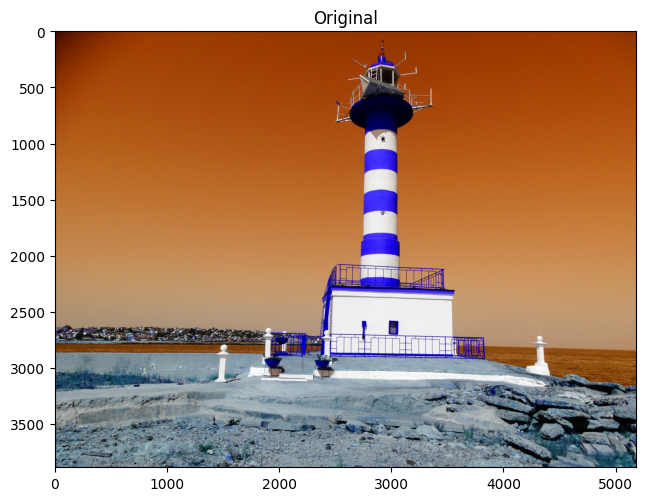

In [25]:
imshow('Original', img)

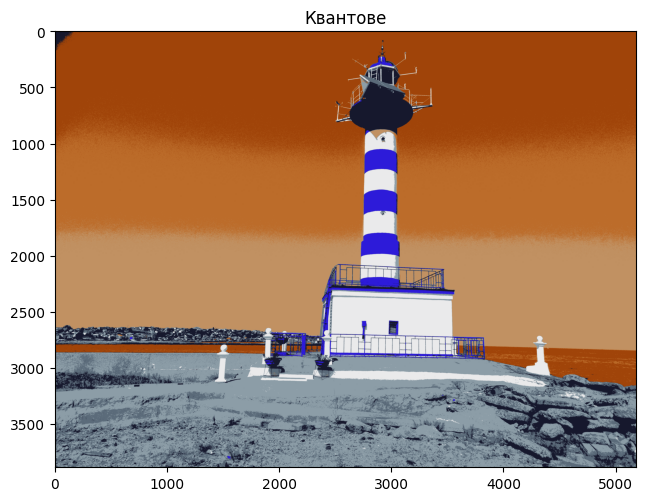

In [22]:
imshow('Квантове', quant_image.astype(np.uint8))
